In [ ]:
import pandas as pd

book = pd.read_csv('/content/sample_data/bestsellers with categories.csv')

book.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [ ]:
book.shape

(550, 7)

In [ ]:
'''
Про скільки книг зберігає дані датасет? 550 книг, перше число, тобто х, у book.shape
'''


In [ ]:
book.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
book.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [ ]:
book.isna().sum()

#Чи є в якихось змінних пропуски? (Hі)

,0
name,0
author,0
user_rating,0
reviews,0
price,0
year,0
genre,0


In [ ]:
unique_genre = book["genre"].drop_duplicates()
unique_genre

,genre
0,Non Fiction
1,Fiction


In [ ]:
print("Унікальні жанри: ", unique_genre.tolist())

Унікальні жанри:  ['Non Fiction', 'Fiction']


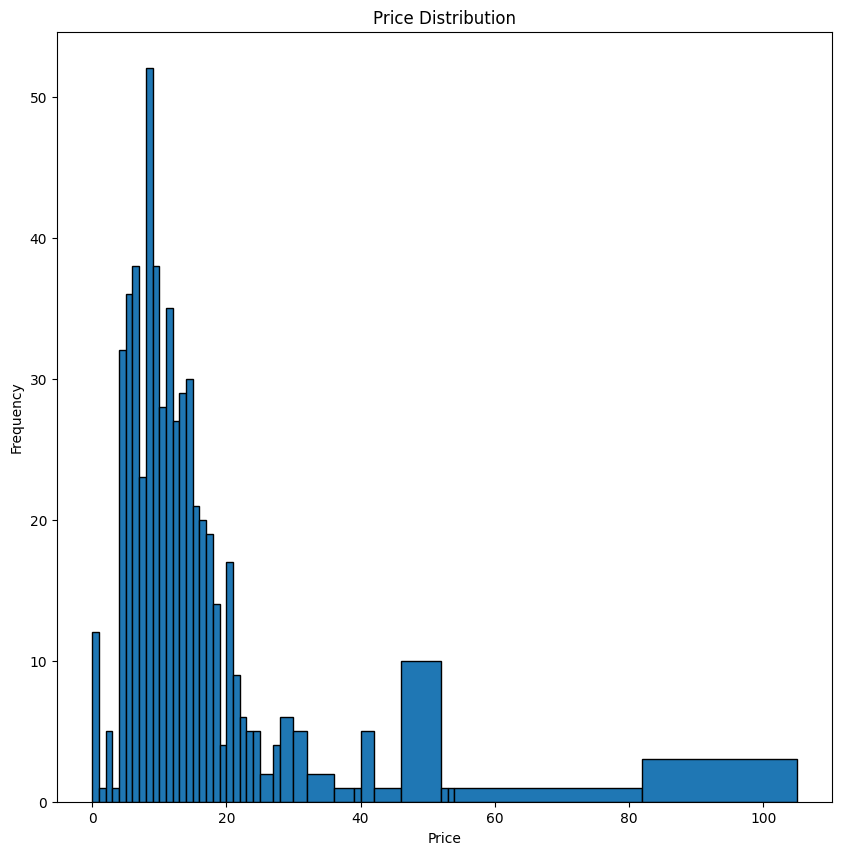

In [ ]:
import matplotlib.pyplot as plt

unique_price = sorted(book['price'].unique())

book['price'].plot(kind='hist', bins=unique_price, edgecolor = 'black', figsize=(10,10))
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Price Distribution")
plt.show()

In [ ]:
book['price'].agg(["max","min","mean","median"])

,price
max,105.0
min,0.0
mean,13.1
median,11.0


In [ ]:
'''
Відповідь: Максимальна ціна? 105
Відповідь: Мінімальна ціна? 0
Відповідь: Середня ціна? 13.1
Відповідь: Медіанна ціна? 11

'''

In [ ]:
print("Відповідь: ", book["user_rating"].max())

Відповідь:  4.9


In [ ]:
print("Скільки книг мають такий рейтинг?", book[book["user_rating"] == 4.9]["name"].nunique() )

Скільки книг мають такий рейтинг? 28


In [ ]:
print('Яка книга має найбільше відгуків: \n', book.loc[book['reviews'].idxmax()])

Яка книга має найбільше відгуків: 
 name           Where the Crawdads Sing
author                     Delia Owens
user_rating                        4.8
reviews                          87841
price                               15
year                              2019
genre                          Fiction
Name: 534, dtype: object


In [ ]:
print('З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча?\nВідповідь:', book.loc[book[book["year"]==2015]["price"].idxmax(), "name"] )

З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча?
Відповідь: Publication Manual of the American Psychological Association, 6th Edition


In [ ]:
print('Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році?\nВідповідь:', book[(book["year"]==2010) & (book["genre"]=="Fiction")]['name'].count())

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році?
Відповідь: 20


In [ ]:
#Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках?

option_one = book[(book["user_rating"]==4.9) & ((book["year"]==2010) | (book["year"]==2011))]["name"].count()

option_two = book[(book["user_rating"]==4.9) & (book["year"].isin([2010,2011]))]["name"].count()

print("Відповідь:", option_one)
print("Відповідь:", option_two)

Відповідь: 1
Відповідь: 1


In [ ]:
sorted_book = book[(book['year']==2015) & (book['price']<8)].sort_values(by = 'price', ascending = True)

print(f'Книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів.(Відсортовані за зростанням ціни):', sorted_book)

Книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів.(Відсортовані за зростанням ціни):                                                   name              author  \
507                              To Kill a Mockingbird          Harper Lee   
210                      Laugh-Out-Loud Jokes for Kids         Rob Elliott   
206                         Knock-Knock Jokes for Kids         Rob Elliott   
111                                    First 100 Words        Roger Priddy   
123                               Giraffes Can't Dance       Giles Andreae   
54   Creative Haven Creative Cats Coloring Book (Ad...     Marjorie Sarnat   
63                      Dear Zoo: A Lift-the-Flap Book        Rod Campbell   
89   Dover Creative Haven Art Nouveau Animal Design...         Marty Noble   
478                        The Very Hungry Caterpillar          Eric Carle   
201  Killing Reagan: The Violent Assault That Chang...       Bill O'Reilly   
28                        Baby

In [ ]:
#Відповідь: Яка книга остання у відсортованому списку?

print('Відповідь: Яка книга остання у відсортованому списку?\n Відповідь: ', sorted_book.iloc[-1, :][['name', 'author']] )

Відповідь: Яка книга остання у відсортованому списку?
 Відповідь:  name      Old School (Diary of a Wimpy Kid #10)
author                              Jeff Kinney
Name: 253, dtype: object


In [ ]:
book.groupby(by= "genre").agg({"price": ["max","min"]})

price    
              max min
genre                
Fiction        82   0
Non Fiction   105   0

In [ ]:
#Відповідь: Максимальна ціна для жанру Fiction:
#Відповідь: 82

#Відповідь: Мінімальна ціна для жанру Fiction:
#Відповідь: 0

#Відповідь: Максимальна ціна для жанру Non Fiction:
#Відповідь: 105

#Відповідь: Мінімальна ціна для жанру Non Fiction:
#Відповідь: 0

In [ ]:
author_dataframe = book.groupby(by="author").agg({"name":"count"})
author_dataframe.columns = ["quantity_of_books"]
author_dataframe.reset_index(inplace=True)

print(author_dataframe.index)
author_dataframe

RangeIndex(start=0, stop=248, step=1)


,author,quantity_of_books
0,Abraham Verghese,2
1,Adam Gasiewski,1
2,Adam Mansbach,1
3,Adir Levy,1
4,Admiral William H. McRaven,1
...,...,...
243,Walter Isaacson,3
244,William Davis,2
245,William P. Young,2
246,Wizards RPG Team,3


In [ ]:
print("Розмір таблиці: ",author_dataframe.shape)

print("Автор з найбільшою кількістю книг: ", author_dataframe.iloc[author_dataframe.sort_values(by= "quantity_of_books", ascending=False)["quantity_of_books"].idxmax()]["author"])

print("Кількість книг цього автора: ",author_dataframe.iloc[author_dataframe.sort_values(by="quantity_of_books", ascending=False)["quantity_of_books"].idxmax()]["quantity_of_books"])

Розмір таблиці:  (248, 2)
Автор з найбільшою кількістю книг:  Jeff Kinney
Кількість книг цього автора:  12


In [ ]:
author_rating = book.groupby(by="author").agg({"user_rating":"mean"})

author_rating.columns=["mean_user_rating"]
author_rating.reset_index(inplace=True)
author_rating

,author,mean_user_rating
0,Abraham Verghese,4.600000
1,Adam Gasiewski,4.400000
2,Adam Mansbach,4.800000
3,Adir Levy,4.800000
4,Admiral William H. McRaven,4.700000
...,...,...
243,Walter Isaacson,4.566667
244,William Davis,4.400000
245,William P. Young,4.600000
246,Wizards RPG Team,4.800000


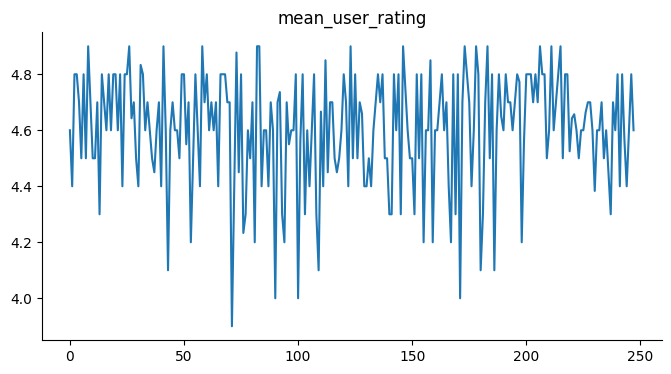

In [ ]:
from matplotlib import pyplot as plt
author_rating['mean_user_rating'].plot(kind='line', figsize=(8, 4), title='mean_user_rating')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
print("Автор з мінімальним середнім рейтингом: ", author_rating.iloc[author_rating["mean_user_rating"].idxmin()]["author"])

print("Його рейтинг : ", author_rating.iloc[author_rating["mean_user_rating"].idxmin()]["mean_user_rating"])

Автор з мінімальним середнім рейтингом:  Donna Tartt
Його рейтинг :  3.9


In [ ]:
if 'author' in author_dataframe.columns:
    author_dataframe.set_index("author", inplace=True)
if 'author' in author_rating.columns:
    author_rating.set_index("author", inplace=True)
total_authors_info = pd.concat([author_dataframe, author_rating],axis=1)
total_authors_info.reset_index(inplace=True)
total_authors_info

,author,quantity_of_books,mean_user_rating
0,Abraham Verghese,2,4.600000
1,Adam Gasiewski,1,4.400000
2,Adam Mansbach,1,4.800000
3,Adir Levy,1,4.800000
4,Admiral William H. McRaven,1,4.700000
...,...,...,...
243,Walter Isaacson,3,4.566667
244,William Davis,2,4.400000
245,William P. Young,2,4.600000
246,Wizards RPG Team,3,4.800000


In [ ]:
total_authors_info_sorted = total_authors_info.sort_values(["quantity_of_books","mean_user_rating"])
total_authors_info_sorted

,author,quantity_of_books,mean_user_rating
171,Muriel Barbery,1,4.000000
43,Chris Cleave,1,4.100000
109,Ian K. Smith M.D.,1,4.100000
186,Pierre Dukan,1,4.100000
81,Elizabeth Strout,1,4.200000
...,...,...,...
11,American Psychological Association,10,4.500000
226,Suzanne Collins,11,4.663636
92,Gary Chapman,11,4.736364
197,Rick Riordan,11,4.772727


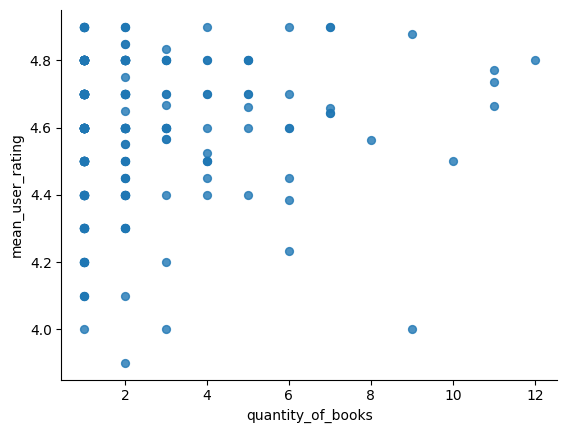

In [ ]:
# @title quantity_of_books vs mean_user_rating

from matplotlib import pyplot as plt
total_authors_info_sorted.plot(kind='scatter', x='quantity_of_books', y='mean_user_rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
print("Перший автор у списку: ",total_authors_info_sorted.iloc[0,0])

Перший автор у списку:  Muriel Barbery


In [ ]:
import seaborn as sns

total_auth = total_authors_info.sort_values(["quantity_of_books","mean_user_rating"], ascending=False)
top_10_authors = total_auth[0:10]
top_10_authors

,author,quantity_of_books,mean_user_rating
120,Jeff Kinney,12,4.800000
197,Rick Riordan,11,4.772727
92,Gary Chapman,11,4.736364
226,Suzanne Collins,11,4.663636
11,American Psychological Association,10,4.500000
73,Dr. Seuss,9,4.877778
90,Gallup,9,4.000000
199,Rob Elliott,8,4.562500
58,Dav Pilkey,7,4.900000
83,Eric Carle,7,4.900000


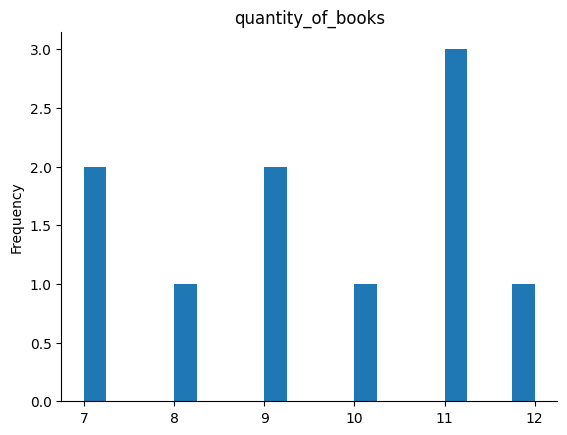

In [ ]:
# @title quantity_of_books

from matplotlib import pyplot as plt
top_10_authors['quantity_of_books'].plot(kind='hist', bins=20, title='quantity_of_books')
plt.gca().spines[['top', 'right',]].set_visible(False)